# Лекция 5 (Кортежи, словари, множества, подключение модулей)

# Кортежи

Как говорилось ранее, кортежи это неизменяемые списки. Их удобно использовать для защиты данных, которые не должны быть изменены. Создать кортеж можно следующим образом:

In [ ]:
a = (1, 2, 3, 4, 5, 6)
print(a)

(1, 2, 3, 4, 5, 6)


Чтобы создать пустой кортеж, необходимо применить метод `tuple()`:

In [ ]:
a = tuple()
print(a)

()


Если вам нужен кортеж из одного элемента, то он создается следующим образом:

In [ ]:
a = (1,)
print(a)

(1,)


Если не указать на конце запятую, тогда мы получим не кортеж, а элемент того типа, который мы указали:

In [ ]:
a = (1)
print(a)

1


Кстати, необязательно даже указывать скобки, кортеж можно создать и без них:

In [10]:
a = 1, 2, 3, 4
print(a)

(1, 2, 3, 4)


Также кортежи могут хранить самые разные данные:

In [20]:
a = (True, [1,2,3], "hello", 5, {"house": "дом"})
print(a)

(True, [1, 2, 3], 'hello', 5, {'house': 'дом'})


Причем, смотрите, если обратиться, например, к списку:

In [21]:
a[1]

[1, 2, 3]

то сам по себе список – это изменяемый тип, следовательно, его значение даже в кортеже мы можем спокойно менять:

In [22]:
a[1].append("5")
print(a)

(True, [1, 2, 3, '5'], 'hello', 5, {'house': 'дом'})


То есть, неизменяемость кортежа относится к его структуре элементов и переменным

![](img/tuple_structure.jpg)

которые ссылаются на конкретные объекты. Но, если объекты могут изменяться, то это никто не запрещает делать.

Над кортежами работают все операции, работающие со списками, которые не вносят изменения в список:

In [23]:
a = ("abc", 2, [1,2], True, 2, 5)
a.count("abc")
a.count(2)

2

In [24]:
a.index(2)

1

# Множества

Множества содержат неповторяющиеся данные в произвольном порядке. Создадим множество несколькими способами:

In [5]:
a = set()
print(a)

set()


In [26]:
a = set('lambda')
print(a)

{'b', 'd', 'm', 'l', 'a'}


In [27]:
a = {'m', 'a', 'd', 'l', 'b'}
print(a)

{'b', 'd', 'm', 'a', 'l'}


In [28]:
a = {i ** 2 for i in range(10)}
print(a)

{0, 1, 64, 4, 36, 9, 16, 49, 81, 25}


Множества удобно использовать для удаления повторяющихся элементов:

In [29]:
words = ['lambda', 'best', 'mai', 'mai']
set(words)

{'best', 'lambda', 'mai'}

## Методы для работы со множествами
Методы множеств, в основном, вызываются по схеме: `set.method()`. Ниже будут перечислены полезные методы для работы с множествами:

- `len(s)` - число элементов в множестве (размер множества)

In [ ]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
len(a)

5

- `x in s` - принадлежит ли `x` множеству `s`

In [ ]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
'a' in a

True

- `isdisjoint(other)` - истина, если `set` и `other` не имеют общих элементов

In [ ]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
a.isdisjoint('a')

False

In [ ]:
a.isdisjoint('f')

True

 - `set.issubset(other)` или `set <= other` - истина, если все элементы `set` принадлежат `other`
 - `set.issuperset(other)` или `set >= other` - аналогично

In [ ]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
a.issubset({'a', 'b', 'c', 'd','f','e'})

False

In [ ]:
a.issuperset({'a', 'b', 'c', 'd','f','e'})

False

- `union(other, ...)` или `set | other | ...` - возвращает объединение нескольких множеств

![](img/set_union.png)

In [32]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
new_a = a.union({'f','d'})
print(new_a)
print(a)

{'b', 'd', 'm', 'f', 'a', 'l'}
{'b', 'd', 'm', 'a', 'l'}


- `intersection(other, ...)` или `set & other & ...` - возвращает пересечение множеств

![](img/set_intersection.png)

In [31]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
new_a = a.intersection({'f','a'})
print(new_a)
print(a)

{'a'}
{'b', 'd', 'm', 'a', 'l'}


- `difference(other, ...)` или `set - other - ...` -возвращает множество из всех элементов set, не принадлежащие ни одному из other

![](img/set_difference.png)

In [ ]:
a = {'l', 'a', 'm', 'b', 'd', 'a'}
a.difference({'a','f','d'})

{'b', 'l', 'm'}

- `symmetric_difference(other)`; `set ^ other` - возвращает множество из элементов, встречающихся в одном множестве, но не встречающиеся в обоих

![](img/set_symmetric_difference.png)

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.symmetric_difference({'a','d'})

{'b', 'c'}

- `copy()` - копия множества

In [ ]:
a = {'a', 'b', 'c', 'd'}
d = a.copy()
print(d)

{'a', 'b', 'd', 'c'}


- `update(other, ...)`; `set |= other | ...` - объединение множеств. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.update({'w','z'})
print(a)

{'c', 'w', 'z', 'a', 'b', 'd'}


- `intersection_update(other, ...)`; `set &= other & ...` - пересечение множеств. Метод, вносящий изменения в множество


In [ ]:
a = {'a', 'b', 'c', 'd'}
a.intersection_update({'a','d'})
print(a)

{'a', 'd'}


- `difference_update(other, ...); set -= other | ...` - вычитание множеств. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.difference_update({'a','d'})
print(a)

{'c', 'b'}


- `symmetric_difference_update(other); set ^= other` - множество из элементов, встречающихся в одном множестве, но не встречающиеся в обоих. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.symmetric_difference_update({'a','b'})
print(a)

{'d', 'c'}


- `add(elem)` - добавляет элемент в множество. Метод, вносящий изменения в множество

In [37]:
a = {'a', 'b', 'c', 'd'}
a.add('r')
print(a)

{'b', 'd', 'r', 'c', 'a'}


- `remove(elem)` - удаляет элемент из множества. KeyError, если такого элемента не существует. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.remove('b')
print(a)

{'a', 'd', 'c'}


- `discard(elem)` - удаляет элемент, если он находится в множестве. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.discard('c')
print(a)

{'a', 'b', 'd'}


- `pop()` - удаляет первый элемент из множества. Так как множества не упорядочены, нельзя точно сказать, какой элемент будет первым. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.pop()

'a'

In [ ]:
print(a)

{'b', 'd', 'c'}


- `clear()` - очистка множества. Метод, вносящий изменения в множество

In [ ]:
a = {'a', 'b', 'c', 'd'}
a.clear()
print(a)

set()


`frozenset`: единственное отличие от `set` заключается в том, что `frozenset` не меняется, соответственно, к `frozenset` можно применить только те методы, которые не меняют множество.

# Словари



Словари - это неупорядоченные коллекции пар "ключ-значение". Т.к. словари являются неупорядоченными коллекциями, то к ним не применяется понятие индекса элемента и не применяется операция извлечения среза.


Чтобы создать словарь можно использовать метод `dict()`:

In [ ]:
d = dict(short='dict', long='dictionary')
print(d)

{'short': 'dict', 'long': 'dictionary'}


In [ ]:
d = dict([(1, 1), (2, 4)])
print(d)

{1: 1, 2: 4}


В созданных выше словарях мы получили пары "ключ-значение", в частности ключ short и соответствующее ему значение dict.

Также можно создать словарь следующим образом:

In [ ]:
d = {}
print(d)

d = {'dict': 1, 'dictionary': 2}
print(d)

{}
{'dict': 1, 'dictionary': 2}


Еще один способ - использовать метод `fromkeys()`:

In [ ]:
d = dict.fromkeys(['a', 'b'])
print(d)

{'a': None, 'b': None}


In [ ]:
d = dict.fromkeys(['a', 'b'], 100)
print(d)

{'a': 100, 'b': 100}


Также можно использовать генератор словарей:

In [ ]:
d = {a: a ** 2 for a in range(7)}
print(d)

{0: 0, 1: 1, 2: 4, 3: 9, 4: 16, 5: 25, 6: 36}


Как можно работать со словарями:

In [ ]:
d = {1: 2, 2: 4, 3: 9}
print(d[1])

2


In [ ]:
d[4] = 4 ** 2
print(d)

{1: 2, 2: 4, 3: 9, 4: 16}


In [ ]:
d['1']

KeyError: '1'

В первом случае мы обратились к ключу "1", после чего получили вывод на экран его значения "2". Затем мы создали новый ключ "4" и присвоили ему значение "16", после чего эта пара добавилась к нашему словарю. В последнем примере мы попробовали обратиться к несуществующему ключу, поскольку значение '1' стоит в кавычках, а значит это другой тип данных, которого нет в нашем словаре, после чего получили сообщение о том, что такого ключа нет.

## Методы для работы со словарями


Методы вызываются по схеме: `dict.method()`. Ниже будут перечислены полезные методы для работы со словарями:

- `clear()` - очищает словарь

In [ ]:
d = {'a': 1, 'b': 2}
d.clear()
print(d)

{}


- `copy()` - возвращает копию словаря

In [ ]:
d = {'a': 1, 'b': 2}
b = d.copy()
print(b)

{'a': 1, 'b': 2}


- `fromkeys(seq[,value])` - создает словарь с ключами из seq и значением value

In [ ]:
d.fromkeys(['a', 'b'], 10)

{'a': 10, 'b': 10}

- `get(key[, default])` - возвращает значение ключа, но если его нет, возвращает `default`

In [ ]:
d = {'a': 1, 'b': 2}
d.get('a')

1

- `items()` - возвращает пары (ключ, значение)

In [40]:
d = {'a': 1, 'b': 2}
print(d.items())

dict_items([('a', 1), ('b', 2)])


In [39]:
d = {'a': 1, 'b': 2}

for el in d.items():
    print(el)

('a', 1)
('b', 2)


-     `keys()` - возвращает ключи в словаре

In [ ]:
d = {'a': 1, 'b': 2}
print(d.keys())

dict_keys(['a', 'b'])


-     `pop(key[, default])` - удаляет ключ и возвращает значение. Если ключа нет, возвращает `default` (по умолчанию бросает исключение).

In [42]:
d = {'a': 1, 'b': 2}
d.pop('a')

1

In [ ]:
print(d)

{'b': 2}


-  `popitem()` - удаляет и возвращает пару (ключ, значение) с конца

In [ ]:
d = {'a': 1, 'b': 2}
d.popitem()

('b', 2)

In [ ]:
print(d)

{'a': 1}


-  `setdefault(key[, default])` - возвращает значение ключа, но если его нет, создает ключ с значением `default`

In [49]:
d = {'a': 1, 'b': 2}
d.setdefault('e', 6)


6

In [ ]:
d.setdefault('f')
print(d)

{'a': 1, 'b': 2, 'e': 6, 'f': None}


-     `update([other])` - обновляет словарь, добавляя пары (ключ, значение) из other. Существующие ключи перезаписываются

In [51]:
d = {'a': 1, 'b': 2}
d.update({'c':5})
print(d)

{'a': 1, 'b': 2, 'c': 5}


- `values()` - возвращает значения в словаре

In [ ]:
d = {'a': 1, 'b': 2}
d.values()

dict_values([1, 2])

# Подключение модулей


Модулем в Python называется любой файл с программой с расширением `.py`. То есть любой ваш код, заключенный в файл, является модулем. Когда разрабатывается любая программа, она редко ограничивается одним файлом. Обычно это набор файлов. Для того, чтобы не писать один и тот же код в каждом файле, к каждому файлу можно подключить другой файл. Подключив другой файл (модуль), из него можно достать полезный метод, который может понадобиться.

Давайте в качестве примера подключим стандартный модуль `datetime`, чтобы достать оттуда метод `datetime.today()`:

In [ ]:
import datetime
print(datetime.datetime.today()) 

2021-09-18 22:03:07.956030


Подключив стандартный модуль, мы достали метод получения текущей даты и времени, после чего вызвали его и получили вывод на экран. На языке Python очень много дополнительных библиотек, которые можно доустановить и затем вызвать необходимые методы для улучшения работоспособности своего кода, а зачастую и раскрывая новые возможности. Прежде чем начать работать с новой для себя библиотекой, стоит ознакомиться с ее методами, чтобы эффективно использовать в своей работе.

Также можно использовать псевдонимы для модулей, чтобы сократить их названия:

In [ ]:
import datetime as m
print(m.datetime.today())

2021-09-18 22:03:36.903507


Можно сделать подключение модуля еще удобнее использовав инструкцию `from`:

In [ ]:
from datetime import datetime as m
print(m.today())

2021-09-18 22:04:06.733078


Также мы можем достать все методы сразу, использовав символ *:

In [57]:
from datetime import *

MINYEAR

1

In [68]:
from glob import glob

img_paths = glob('./img/*')
print(img_paths)

['./img/2_loop.png', './img/2_pics.png', './img/1_pics.png', './img/set_symmetric_difference.png', './img/1_loop.png', './img/tuple_structure.jpg', './img/exeption.png', './img/3_loop.png', './img/set_intersection.png', './img/set_difference.png', './img/set_union.png']


In [69]:
from glob import glob
from pprint import pprint

img_paths = glob('./img/*')
pprint(img_paths)

['./img/2_loop.png',
 './img/2_pics.png',
 './img/1_pics.png',
 './img/set_symmetric_difference.png',
 './img/1_loop.png',
 './img/tuple_structure.jpg',
 './img/exeption.png',
 './img/3_loop.png',
 './img/set_intersection.png',
 './img/set_difference.png',
 './img/set_union.png']


In [64]:
from glob import glob
import os

img_name = os.path.basename('./img/tuple_structure.jpg')
print(img_name)

tuple_structure.jpg


# Сторонние библиотеки

Сторонние модули можно установить через ```pip```.

Что такое ```pip```? ```pip``` - стандартный менеджер пакетов для Python. Он позволяет устанавливать и управлять дополнительными пакетами, которые не являются частью стандартной библиотеки Python. 


Установщик Python устанавливает pip самостоятельно, и он готов к использованию, если вы не установили старую версию Python. Вы можете убедиться, что pip доступен, выполнив в консоли следующую команду:

In [99]:
!pip --version

pip 22.2.2 from /home/petr/anaconda3/envs/virtual_hydropost/lib/python3.10/site-packages/pip (python 3.10)


```pip``` предоставляет команду ```install``` для установки модулей (пакетов).

Вы используете ```pip``` с командой ```install```, за которой следует имя пакета, который вы хотите установить. ```pip``` ищет пакет свежей версии в ```PyPI```, вычисляет его зависимости и устанавливает их.

In [70]:
!pip install numpy

In [73]:
import numpy as np

A = np.array([[1, 2], [3, 2]])
B = np.array([[3, 2], [1, 1]])

np.matmul(A, B)

array([[ 5,  4],
       [11,  8]])

In [74]:
!pip install matplotlib

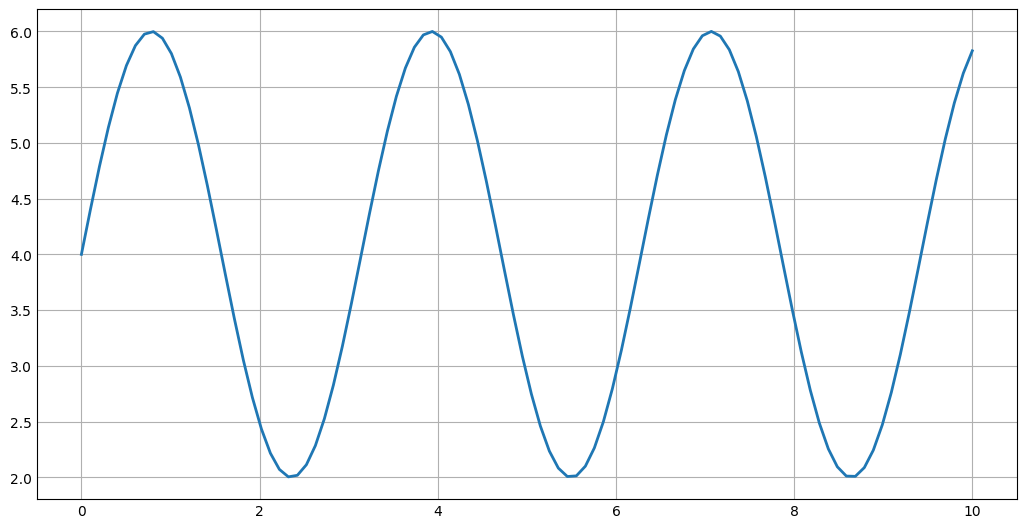

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# make data
x = np.linspace(0, 10, 100)
y = 4 + 2 * np.sin(2 * x)

# plot
fig = plt.figure(figsize=(10,5))
ax = fig.subplots()
ax.plot(x, y, linewidth=2)

In [98]:
!pip install pandas

In [101]:
import pandas as pd

data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
pd.DataFrame.from_dict(data)

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d
